In [1]:
import pandas as pd
import numpy as np

In [2]:
all_fights = pd.read_csv('Data Sets/Merged_Fights_Fighters.csv')
all_fights.drop(['Unnamed: 0'], axis=1, inplace=True)

In [3]:
all_fights.head()

,event_place,f1result,f2result,f1fid,f2fid,method,method_d,ref,f1name,f1nick,...,f2nick,f2height,f2weight,f2association,f2class,f2locality,f2country,f1age,f2age,match_time
0,"McNichols Arena, Denver, Colorado, United States",win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,Royce Gracie,None,...,None,77.0,216.0,Kamakura,Heavyweight,The Hague,Netherlands,27.0,38.0,1.733333
1,"McNichols Arena, Denver, Colorado, United States",win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,Jason DeLucia,None,...,None,74.0,185.0,Unassociated,Middleweight,"Denver, Colorado",United States,24.0,30.0,0.866667
2,"McNichols Arena, Denver, Colorado, United States",win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,Royce Gracie,None,...,The World's Most Dangerous Man,73.0,212.0,Lion's Den,Heavyweight,"San Diego, California",United States,27.0,29.0,0.950000
3,"McNichols Arena, Denver, Colorado, United States",win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,Gerard Gordeau,None,...,None,76.0,265.0,Unassociated,Heavyweight,"Tampa, Florida",United States,38.0,31.0,0.983333
4,"McNichols Arena, Denver, Colorado, United States",win,loss,4,21,Submission,Heel Hook,Helio Vigio,Ken Shamrock,The World's Most Dangerous Man,...,None,74.0,225.0,Unassociated,Heavyweight,"Denver, Colorado",United States,29.0,30.0,1.816667


In [4]:
#mask to remove contested fights
mask_no_contest_1 = ((all_fights.method != 'No Contest - Hoffman Failed Drug Test') & 
                   (all_fights.method != 'No Contest - Overturned by State Commission') &
                    (all_fights.method != 'No') & (all_fights.method != "NC") & 
                    (all_fights.method != 'No Contest - Caceres Failed Drug Test') & 
                     (all_fights.method != 'No Contest - Overturned by Commission' ) & 
                     (all_fights.method !='No Contest') & (all_fights.method != 'Draw'))
# df_contested fights
fights = all_fights[mask_no_contest_1]

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
fights_by_class = fights.groupby(['f1class'])['method'].count()
fights_by_class = pd.DataFrame(fights_by_class)
fights_by_class = fights_by_class.reset_index()
fights_by_class.head()

,f1class,method
0,Atomweight,1
1,Bantamweight,268
2,Featherweight,342
3,Flyweight,128
4,Heavyweight,394


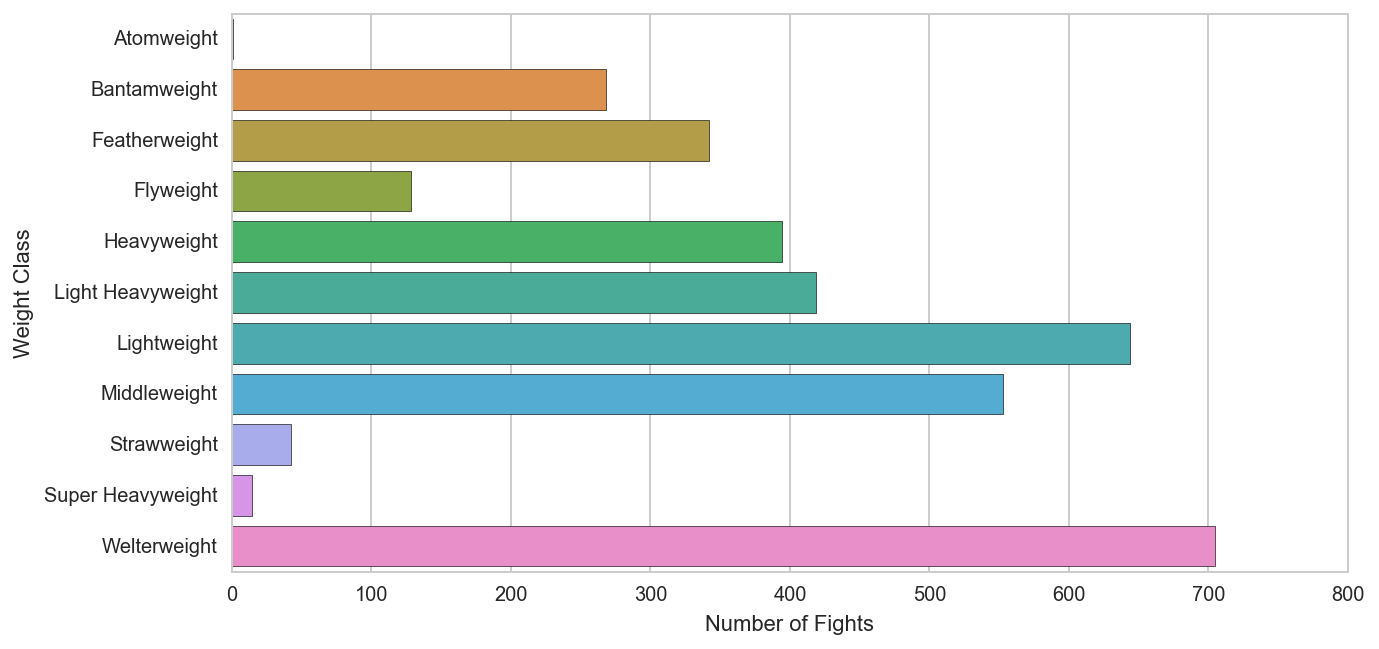

In [7]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'method', y = 'f1class', data = fights_by_class)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Weight Class')

In [8]:
fights_by_dec = fights.groupby(['method'])['f1result'].count()
fights_by_dec = pd.DataFrame(fights_by_dec)
fights_by_dec = fights_by_dec.reset_index()
fights_by_dec.head()

,method,f1result
0,DQ,11
1,Decision,1470
2,KO,414
3,Submission,768
4,TKO,847


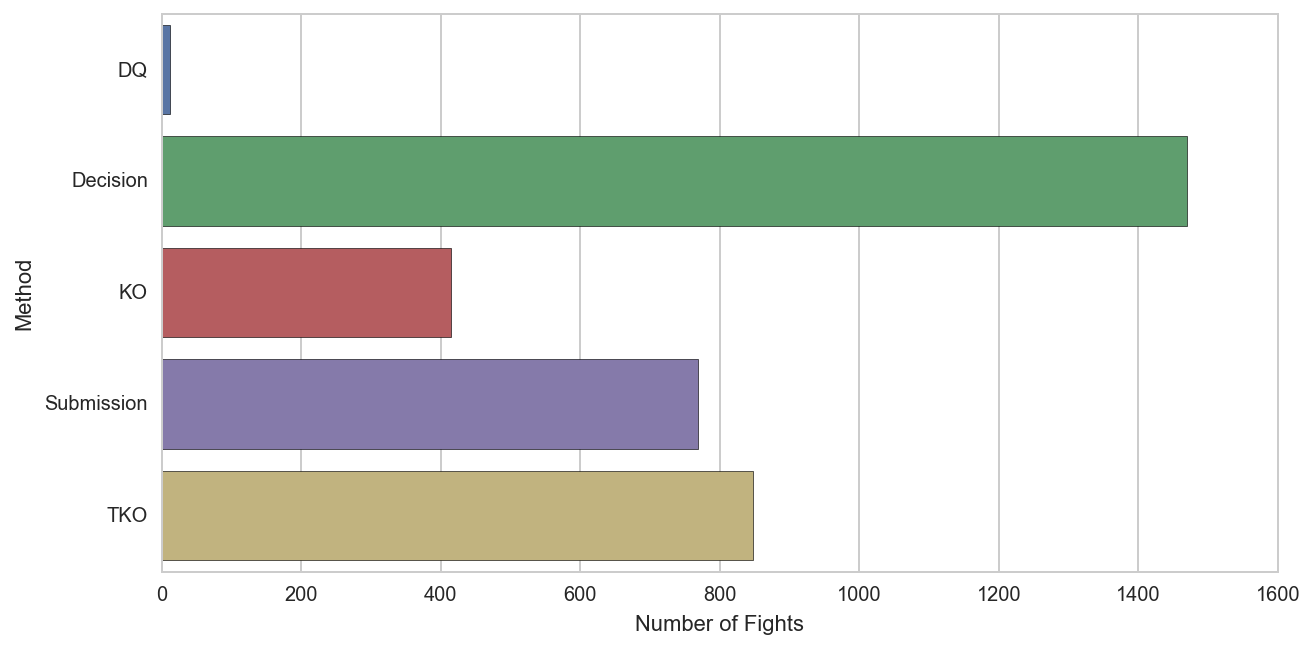

In [9]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'f1result', y = 'method', data = fights_by_dec)
sns.axlabel(xlabel = 'Number of Fights', ylabel = 'Method')

In [10]:
fights.columns

Index([u'event_place', u'f1result', u'f2result', u'f1fid', u'f2fid', u'method',
       u'method_d', u'ref', u'f1name', u'f1nick', u'f1height', u'f1weight',
       u'f1association', u'f1class', u'f1locality', u'f1country', u'f2name',
       u'f2nick', u'f2height', u'f2weight', u'f2association', u'f2class',
       u'f2locality', u'f2country', u'f1age', u'f2age', u'match_time'],
      dtype='object')

In [11]:
#predictors
# X = fights[['event_place', 'ref', 'match_time',
#             'f1name', 'f1height', 'f1weight', 'f1association', 'f1class', 'f1locality', 'f1country', 'f1age',
#             'f2name', 'f2height', 'f2weight', 'f2association', 'f2class', 'f2locality', 'f2country', 'f2age']]
# Y = fights['method']

In [40]:
#Starting my models
import statsmodels.formula.api as smf
import patsy
formula = 'C(method) ~ C(event_place) + C(ref) + match_time + C(f1name) + f1height + f1weight + C(f1association) + C(f1class) + C(f1locality) + C(f1country) + C(f2name) + f2height + f2weight + C(f2association) + C(f2class) + C(f2locality) + C(f2country) - 1'
Y,X = patsy.dmatrices(formula, data=fights, return_type = "dataframe")
print X.shape
print Y.shape

(3510, 5299)
(3510, 5)


In [41]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

In [60]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.svm import SVC
svc = SVC()

In [43]:
lrcv.fit(X_train, Y_train)

ValueError: bad input shape (2351, 5)

In [17]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
knn.score(X_train, Y_train)

0.66312207571246273

In [19]:
knn_scores = cross_val_score(knn,X,Y,cv=10)
print knn_scores
print np.mean(knn_scores)

[ 0.35327635  0.47008547  0.46153846  0.54700855  0.64672365  0.62108262
  0.5954416   0.62393162  0.56695157  0.5954416 ]
0.548148148148


In [20]:
print knn.predict(X)[0:5]
print knn.predict(X_test)[0:5]

[[ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.]]
[[ 0.  1.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]]


In [32]:
from sklearn.grid_search import GridSearchCV

search_parameters_knn = {
    
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto'],
    'leaf_size': [5, 10],
    'n_neighbors': [1],
    'n_jobs': [4],
    'p': [2],
    'metric': ['minkowski']
    }

knn_est = GridSearchCV(knn, search_parameters_knn)

In [34]:
knn_grid = knn_est.fit(X,Y)
print knn_grid.best_params_
print knn_grid.best_score_

{'n_neighbors': 1, 'n_jobs': 4, 'algorithm': 'auto', 'metric': 'minkowski', 'p': 2, 'weights': 'uniform', 'leaf_size': 5}
0.576638176638


In [46]:
DTC.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
dtc_scores = cross_val_score(DTC,X,Y,cv=10)
print dtc_scores
print np.mean(dtc_scores)

[ 0.44159544  0.57264957  0.67236467  0.66951567  0.73504274  0.65527066
  0.68091168  0.73504274  0.68091168  0.67521368]
0.651851851852


In [51]:
search_parameters_dtc = {
    
    'criterion': ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }

dtc_est = GridSearchCV(DTC, search_parameters_dtc)

In [52]:
dtc_grid = dtc_est.fit(X,Y)
print dtc_grid.best_params_
print dtc_grid.best_score_

{'max_features': None, 'splitter': 'best', 'criterion': 'gini', 'max_depth': None}
0.653846153846


In [57]:
bag_knn = BaggingClassifier(knn)
bag_dtc = BaggingClassifier(DTC)

In [59]:
bag_knn_scores = cross_val_score(bag_knn,X,Y,cv=10)
bag_dtc_scores = cross_val_score(bag_dtc,X,Y,cv=10)
print np.mean(bag_knn_scores)
print np.mean(bag_dtc_scores)

ValueError: bad input shape (3159, 5)

In [55]:
search_parameters_bag = {
    'base_estimator':[knn, DTC], 
    'n_estimators':[8,10,12],
    'max_samples': [0., .5, 1., 1.5],
    'max_features': [0., .5, 1., 1.5],
    'n_jobs': [4]
}

bag_est = GridSearchCV(bag, search_parameters_bag)

In [56]:
bag_grid = bag_est.fit(X,Y)
print bag_grid.best_params_
print bag_grid.best_score_

ValueError: bad input shape (2340, 5)

In [61]:
rfc_scores = cross_val_score(rfc,X,Y,cv=10)
print np.mean(rfc_scores)

0.479772079772


In [63]:
search_parameters_rfc = {
    'n_estimators': [10,20,30],
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,3,5, None],
    'max_features': ['auto', 'sqrt', 'log2', None]
    }
rfc_est = GridSearchCV(rfc, search_parameters_rfc)

In [64]:
rfc_grid = rfc_est.fit(X,Y)
print rfc_grid.best_params_
print rfc_grid.best_score_

{'max_features': None, 'n_estimators': 20, 'criterion': 'gini', 'max_depth': None}
0.597150997151


In [44]:
svc.fit(X_train, Y_train)

ValueError: bad input shape (2351, 5)

In [37]:
search_parameters_SVC = {
    'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
    'C':[0.1, 1, 3, 10],
}

svc_est = GridSearchCV(svc, search_parameters_SVC)